В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [1]:
cd C:\Users\Jools\Documents\DS\data

C:\Users\Jools\Documents\DS\data


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

medical_df = pd.read_csv('medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [4]:
non_smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


### Метод найменших квадратів

In [5]:
X = non_smoker_df['age'].values.reshape(-1, 1)
y = non_smoker_df['charges'].values.reshape(-1, 1)

X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]

In [8]:
def normal_equations(X,y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [13]:
MNK_coefs = normal_equations(X_with_intercept, y)
MNK_coefs

array([[-2091.42055657],
       [  267.24891283]])

In [15]:
predictions_MNK = np.dot(X_with_intercept, MNK_coefs)

In [17]:
pd.DataFrame({'Прогноз': predictions_MNK.flatten()[:3], 'Факт': y.flatten()[:3]})

,Прогноз,Факт
0,2719.059874,1725.55230
1,5391.549003,4449.46200
2,6727.793567,21984.47061


In [19]:
rmse = np.sqrt(np.mean((y - predictions_MNK) ** 2))
print(f"RMSE: {rmse:.2f}")

RMSE: 4662.51


### Градієнтний спуск

In [38]:
X = non_smoker_df['age'].values.reshape(-1, 1)
y = non_smoker_df['charges'].values.reshape(-1, 1)
X_b = np.c_[np.ones((X.shape[0], 1)), X]

X_b_scaled = X_b.copy()
X_b_scaled[:, 1] = (X_b[:, 1] - X_b[:, 1].mean()) / X_b[:, 1].std()

y_scaled = (y - y.mean()) / y.std()

def compute_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def gradient_descent(X_b_scaled, y, learning_rate=0.01, epochs=1000):
    m = len(y)
    theta = np.zeros((X_b_scaled.shape[1], 1))
    rmse_list = []

    for i in range(epochs):
        gradients = (2/m) * X_b_scaled.T.dot(X_b_scaled.dot(theta) - y)
        theta -= learning_rate * gradients
        rmse = compute_rmse(y, X_b_scaled.dot(theta))
        rmse_list.append(rmse)

    return theta, rmse_list

learning_rates = [0.01, 0.001, 0.0001]
results = {}

for lr in learning_rates:
    theta, rmse_list = gradient_descent(X_b_scaled, y_scaled, learning_rate=lr, epochs=1000)
    predictions = X_b_scaled.dot(theta)
    predictions_real = predictions * y.std() + y.mean()
    final_rmse_real = compute_rmse(y, predictions_real)
    
    results[lr] = {
        'theta': theta,
        'rmse_list': rmse_list,
        'final_rmse': final_rmse
    }
    print(f"LR = {lr} → RMSE = {final_rmse_real:.2f}, θ = {theta.flatten()}")

LR = 0.01 → RMSE = 4662.51, θ = [-2.77612102e-16  6.27946783e-01]
LR = 0.001 → RMSE = 4690.11, θ = [-2.10353038e-16  5.43133451e-01]
LR = 0.0001 → RMSE = 5587.97, θ = [-3.97945670e-17  1.13837724e-01]


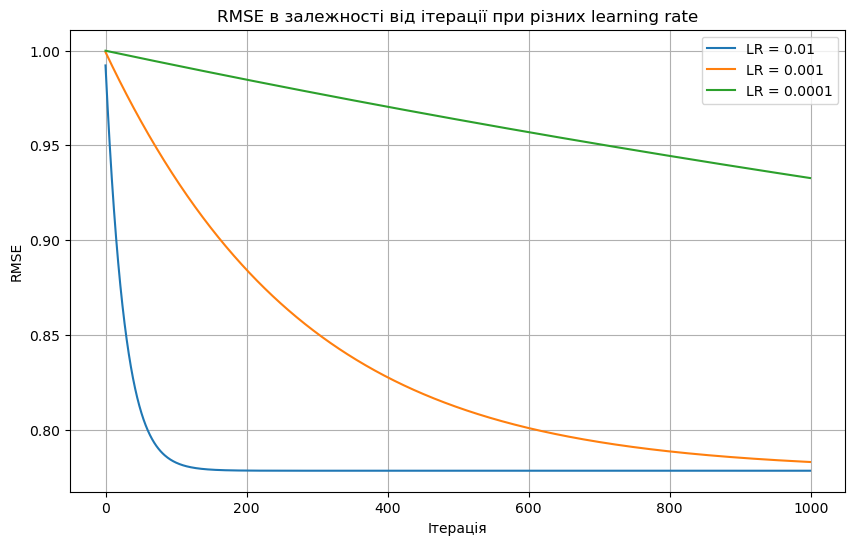

In [25]:
plt.figure(figsize=(10, 6))

for lr in learning_rates:
    plt.plot(results[lr]['rmse_list'], label=f"LR = {lr}")

plt.xlabel("Ітерація")
plt.ylabel("RMSE")
plt.title("RMSE в залежності від ітерації при різних learning rate")
plt.legend()
plt.grid(True)
plt.show()


За допомогою scikitlearn

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = non_smoker_df['age'].to_frame()
y = non_smoker_df['charges']

lin_reg = LinearRegression()
lin_reg.fit(X, y)

intercept = lin_reg.intercept_
coef = lin_reg.coef_[0]
print(f"Коефіцієнти моделі: θ0 = {intercept:.2f}, θ1 = {coef:.2f}")

predictions_sklearn = lin_reg.predict(X)

rmse_sklearn = np.sqrt(mean_squared_error(y, predictions_sklearn))
print(f"RMSE (sklearn): {rmse_sklearn:.2f}")

Коефіцієнти моделі: θ0 = -2091.42, θ1 = 267.25
RMSE (sklearn): 4662.51


C:\Users\Jools\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


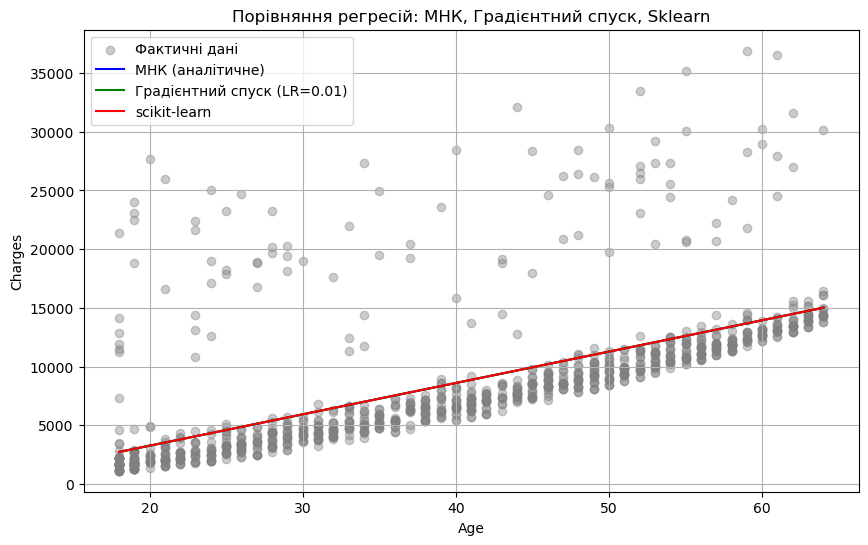

In [44]:
age_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
age_range_b = np.c_[np.ones((age_range.shape[0], 1)), age_range]

# Прогноз МНК
pred_mnk = np.dot(age_range_b, MNK_coefs)  # ← тут np.dot

# Прогноз Gradient Descent (з LR=0.01, кращий)
age_range_scaled = (age_range - X.mean()) / X.std()
age_range_scaled_b = np.c_[np.ones((age_range_scaled.shape[0], 1)), age_range_scaled]

theta_best_gd = results[0.01]['theta']
pred_gd_scaled = np.dot(age_range_scaled_b, theta_best_gd)
pred_gd = pred_gd_scaled * y.std() + y.mean()

# Прогноз Scikit-learn
pred_sklearn = lin_reg.predict(age_range)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Фактичні дані', alpha=0.4, color='gray')

plt.plot(age_range, pred_mnk, label='МНК (аналітичне)', color='blue')
plt.plot(age_range, pred_gd, label='Градієнтний спуск (LR=0.01)', color='green')
plt.plot(age_range, pred_sklearn, label='scikit-learn', color='red')

plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Порівняння регресій: МНК, Градієнтний спуск, Sklearn')
plt.legend()
plt.grid(True)
plt.show()


1. Усі три лінії збігаються.

2. Найкращий RMSE показав метод МНК та sklearn (~4662).
Gradient Descent теж збігся при LR = 0.01, але може бути повільнішим/чутливим до learning rate.

3. Даний прогноз майже збігається з показниками, коли в попередньому домашньому перевіряли коефіцієнти вручну. Втім, беручи до уваги що більшість платежів у нас менше 10000, то модель не є дуже корисною.

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [53]:
smoker_df = medical_df[medical_df.smoker == 'yes']

In [55]:
smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [59]:
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [61]:
X = smoker_df['age'].to_frame ()
y = smoker_df['charges']
lin_reg.fit(X, y)

LinearRegression()

In [65]:
intercept = lin_reg.intercept_
coef = lin_reg.coef_[0]
print(f"Коефіцієнти моделі: θ0 = {intercept:.2f}, θ1 = {coef:.2f}")

Коефіцієнти моделі: θ0 = 20294.13, θ1 = 305.24


In [67]:
predictions = lin_reg.predict(X)
rmse = np.sqrt(mean_squared_error(y, predictions))
print(f"RMSE (курці): {rmse:.2f}")

RMSE (курці): 10711.00


C:\Users\Jools\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


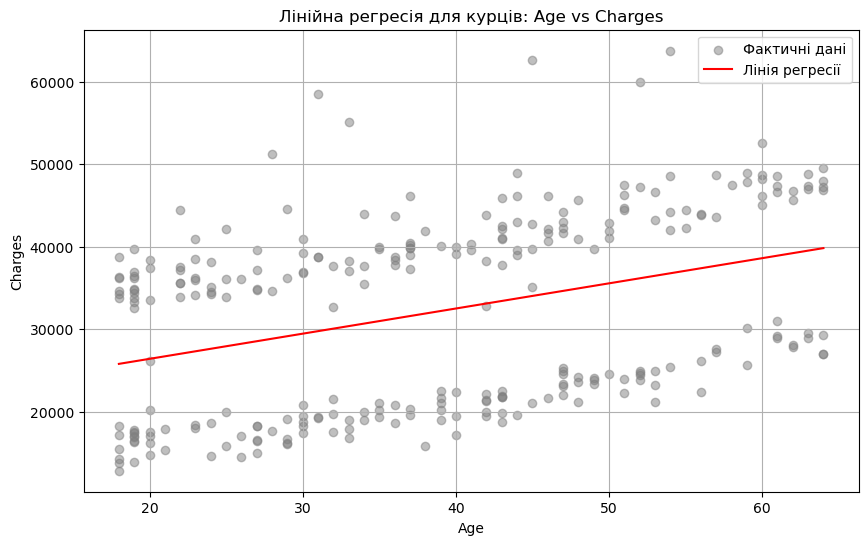

In [73]:
age_range = np.linspace(X['age'].min(), X['age'].max(), 100).reshape(-1, 1)
pred_line = lin_reg.predict(age_range)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', alpha=0.5, label='Фактичні дані')
plt.plot(age_range, pred_line, color='red', label='Лінія регресії')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Лінійна регресія для курців: Age vs Charges')
plt.legend()
plt.grid(True)
plt.show()

Точність: RMSE = 10 711.00 - це дуже велика помилка.

Графік: точки сильно розкидані, вік слабко пояснює витрати.

Висновок: модель не точна, бо не враховує інші важливі фактори (BMI, стать тощо).